In [2]:
import pandas as pd
%matplotlib inline

In [3]:
url = 'http://www.powerball.com/powerball/winnums-text.txt'

In [4]:
from urllib2 import urlopen

In [5]:
fp = urlopen(url)

In [6]:
fp.readline()

'Draw Date   WB1 WB2 WB3 WB4 WB5 PB  PP\r\n'

In [7]:
df = pd.read_csv(fp, header=None, delimiter=" ")

In [8]:
df.dropna(axis=1, how='any', inplace=True)

In [9]:
df.columns = ['date'] + ['ball_{}'.format(i) for i in range(1,6)]+['pb']

In [10]:
df.columns

Index([u'date', u'ball_1', u'ball_2', u'ball_3', u'ball_4', u'ball_5', u'pb'], dtype='object')

In [11]:
df = df.convert_objects(convert_dates=True, convert_numeric=True)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


array([[<matplotlib.axes.AxesSubplot object at 0xb0337cec>,
        <matplotlib.axes.AxesSubplot object at 0xb00d162c>]], dtype=object)

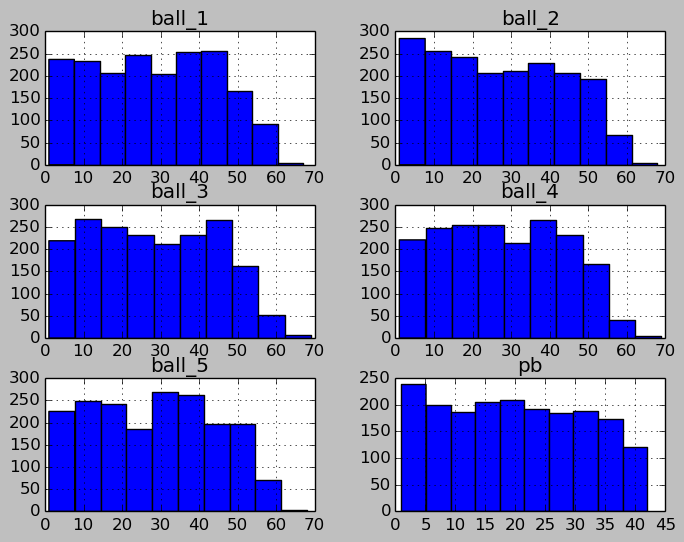

In [58]:
df[df.columns[1:]].hist()

Analysis

The 60 bin is inherently small because numbers greater than 57 were added recently.

In [12]:
df[df.columns[1:len(df.columns)]].describe()

,ball_1,ball_2,ball_3,ball_4,ball_5,pb
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,28.290526,27.126316,28.132632,27.994211,28.242632,20.070526
std,15.943351,16.442084,15.968218,15.674495,15.914912,11.451584
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,13.000000,14.000000,15.000000,15.000000,10.000000
50%,28.000000,26.000000,28.000000,28.000000,29.000000,20.000000
75%,41.000000,41.000000,42.000000,41.000000,41.000000,30.000000
max,67.000000,68.000000,69.000000,69.000000,68.000000,42.000000


In [97]:
# overall is there a tendency for any ball to have more of a favor compared to the others.
# Testing the hypothesis that the proportion of balls from b=1 to b=69 are all equal, p(b_1) == p(b_2) ... p(b_69)

# first stack the columns by unstacking the df and then get the values to form a new df
aggregated_numbers = pd.DataFrame({'numbers':df[df.columns[1:len(df.columns)-1]].unstack().values})

# group by the individual number and gather the proporiton of times each occurs in the grand scheme
individual_frequencies = aggregated_numbers.groupby('numbers').apply(len)

In [99]:
# Given that numbers above 59 were introduced 3 months ago, they skew the data heavily, we'll exclude them
# Given that numbers above 55 were also introduced several years ago, we'll do analysis with and without them.
first_59 = individual_frequencies[:59]

first_59

numbers
1     159
2     177
3     162
4     166
5     183
6     164
7     176
8     181
9     177
10    178
11    167
12    184
13    184
14    186
15    171
16    191
17    173
18    161
19    185
20    188
21    151
22    185
23    170
24    167
25    154
26    192
27    167
28    174
29    159
30    182
31    171
32    195
33    154
34    170
35    173
36    171
37    170
38    171
39    187
40    189
41    194
42    186
43    172
44    163
45    187
46    160
47    165
48    182
49    186
50    125
51    116
52    126
53    108
54    102
55     95
56     60
57     58
58     60
59     65
dtype: int64

In [91]:
from scipy import stats as st

In [101]:
st.chisquare(first_59)

Power_divergenceResult(statistic=441.16580474934034, pvalue=2.4920903079251172e-60)

Interesting, not all numbers have an equal chance of being selected.  Is it due to adding the numbers above 55?

In [102]:
st.chisquare(individual_frequencies[:55])

Power_divergenceResult(statistic=167.09012131715772, pvalue=1.7371424689076649e-13)

Still showing a significant difference among the frequencies for each ball.

changes as shown on wikipedia

<table class="wikitable">
<tbody>
<tr>
<th colspan="5">Changes through the times of the powerball game</th>
</tr>
<tr>
<th>Starting date</th>
<th>Pick 5 of</th>
<th>Pick 1 of</th>
<th>Jackpot chances</th>
<th><i>Power Play</i> multipliers</th>
</tr>
<tr>
<td>April 22, 1992</td>
<td style="text-align:center;">45</td>
<td style="text-align:center;">45</td>
<td style="text-align:center;">1:54,979,154</td>
<td style="text-align:center;">none†</td>
</tr>
<tr>
<td>November 5, 1997</td>
<td style="text-align:center;">49</td>
<td style="text-align:center;">42</td>
<td style="text-align:center;">1:80,089,127</td>
<td style="text-align:center;">none†</td>
</tr>
<tr>
<td>March 7, 2001</td>
<td style="text-align:center;">49</td>
<td style="text-align:center;">42</td>
<td style="text-align:center;">1:80,089,127</td>
<td style="text-align:center;">1×, 2×, 3×, 4×, 5×</td>
</tr>
<tr>
<td>October 9, 2002</td>
<td style="text-align:center;">53</td>
<td style="text-align:center;">42</td>
<td style="text-align:center;">1:120,526,769</td>
<td style="text-align:center;">2×, 3×, 4×, 5×</td>
</tr>
<tr>
<td>August 28, 2005</td>
<td style="text-align:center;">55</td>
<td style="text-align:center;">42</td>
<td style="text-align:center;">1:146,107,961</td>
<td style="text-align:center;">2×, 3×, 4×, 5×</td>
</tr>
<tr>
<td>January 7, 2009</td>
<td style="text-align:center;">59</td>
<td style="text-align:center;">39</td>
<td style="text-align:center;">1:195,249,054</td>
<td style="text-align:center;">2×, 3×, 4×, 5×</td>
</tr>
<tr>
<td>January 15, 2012</td>
<td style="text-align:center;">59</td>
<td style="text-align:center;">35</td>
<td style="text-align:center;">1:175,223,510</td>
<td style="text-align:center;">none</td>
</tr>
<tr>
<td>January 19, 2014</td>
<td style="text-align:center;">59</td>
<td style="text-align:center;">35</td>
<td style="text-align:center;">1:175,223,510</td>
<td style="text-align:center;">2×, 3×, 4×, 5×</td>
</tr>
<tr>
<td>October 7, 2015<sup id="cite_ref-cnbc2015_23-0" class="reference"><a href="#cite_note-cnbc2015-23"><span>[</span>23<span>]</span></a></sup></td>
<td style="text-align:center;">69</td>
<td style="text-align:center;">26</td>
<td style="text-align:center;">1:292,201,338</td>
<td style="text-align:center;">2×, 3×, 4×, 5×, 10×‡</td>
</tr>
</tbody></table>


Lets see if there was a chance if there was equal probability to choose a number for some point in time.

In [103]:
changes = [45, 49, 53, 55, 59, 69]

In [105]:
for change in changes:
    print("When there were {} balls".format(change))
    print(st.chisquare(individual_frequencies[:change]))

When there were 45 balls
Power_divergenceResult(statistic=32.939621202491416, pvalue=0.8892792424008461)
When there were 49 balls
Power_divergenceResult(statistic=35.779205607476634, pvalue=0.90365121566103057)
When there were 53 balls
Power_divergenceResult(statistic=105.81936912008855, pvalue=1.5306888032421963e-05)
When there were 55 balls
Power_divergenceResult(statistic=167.09012131715772, pvalue=1.7371424689076649e-13)
When there were 59 balls
Power_divergenceResult(statistic=441.16580474934034, pvalue=2.4920903079251172e-60)
When there were 69 balls
Power_divergenceResult(statistic=2066.884, pvalue=0.0)


It is to be expected that with each change, the data suggests that there is more and more probability that there is a difference amongst the individual balls in terms frequency.  However, we all know that it doesn't matter..., or does it ? :)

## So you want to know which numbers are chosen the most?  Well, certainly don't pick any of the recently introduced numbers.   But here they are.

In [113]:
individual_frequencies.sort_values(ascending=False).head(5).sort_index()

numbers
16    191
26    192
32    195
40    189
41    194
dtype: int64

## Next step is to do time series analysis using pandas